# Analysis of COVID-19 progression in Great Britain


> Visualisation of changes in COVID-19 prevalence in Great Britain

- toc: true
- branch: master
- hide: false
- search_exclude: false
- badges: true
- comments: false
- author: Alexandre Payot
- categories: [Visualisation, Data, Covid]

zThe aim of this blog post is to show the evolution of COVID numbers in a way that captures the global behaviour of the epidemic and lets us answer key questions like:

* Are the current measures working?
* Is the epidemic accelerating or slowing down?

Far from sentionalist headlines or opinions dismissing SARS-CoV-2 as just another flu, we try to extract reliable patterns from the sometimes erratic data which comes of stretched health and testing systems.

This project was started in April 2020, analysing the data for France as part of [data against covid19](https://opencovid19-fr.github.io/) citizen's initiative. I aim to keep updating the data in this article every week along with the commentary of the dynamic of the epidemic.

In [1]:
#hide
%load_ext autoreload
%autoreload 2

In [89]:
#collapse-hide
import pandas as pd
import numpy as np
from uk_covid19 import Cov19API
import datetime
from matplotlib import pyplot as plt
from IPython.display import display, Markdown

You can find and inspect the code used for visualisation at the following address: [payoto/covid19-viz](https://github.com/payoto/covid19-viz).

In [3]:
import viz

In [91]:
# hide
display(Markdown("Article updated on {}".format(datetime.date.today().strftime("%d/%m/%Y"))))

Article updated on 29/11/2020

## Data access

For this analysis, the [government's API for COVID-19 data](https://coronavirus.data.gov.uk/details/developers-guide#structure-metrics) is used to access data, as installed from [pypi](https://pypi.org/project/uk-covid19/).

In [41]:
all_nations = [
    "areaType=nation"
]
cases_and_deaths = {
    "date": "date",
    "maille_code": "areaName",
    "cas_confirmes": "cumCasesByPublishDate",
    "deces":"cumDeaths28DaysByDeathDate",
    "reanimation": "covidOccupiedMVBeds",
    "hospitalises": "hospitalCases"
}

api = Cov19API(
    filters=all_nations,
    structure={c : c for c in cases_and_deaths.values()}
)
df = api.get_dataframe()
df = df.rename(
    {v : k for k, v in cases_and_deaths.items()},
    axis="columns"
)
df = df.iloc[::-1]

Our analysis is based on my previous visualisation of French data, in that respect we get it in the same format.

In [62]:
df = viz.enable_time_series_plot(
    df, timein_field="date", timeseries_field_out="t"
)
df["source_nom"] = "PHE"
df["maille_nom"] = df["maille_code"]

## Latest data for England

In this section we look at the processed data for England.
In the first plot on the left the raw data is presented, then the data smoothed over is smoothed using a moving average over 7 days. On the right the number on the vertical axis is the daily change as a proportion of the total.

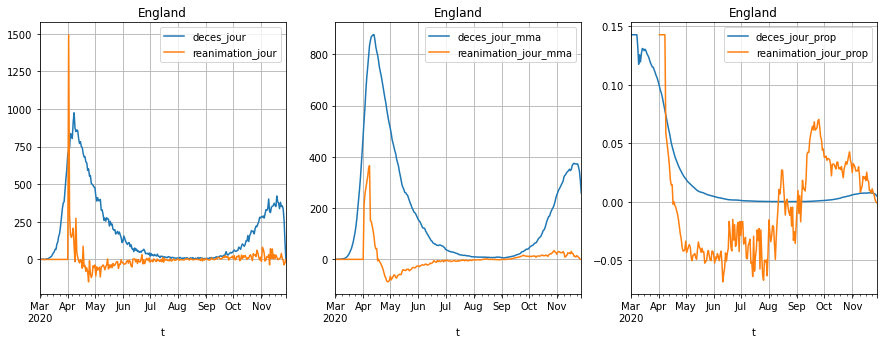

In [64]:
#collapse-hide

maille_active = 'England'
data = viz.oc19_data_preproc(
    df, maille_active,
    rows=["t", "deces", "reanimation", "hospitalises", "cas_confirmes"],
    no_negatives=["deces"],
)

In [65]:
data.tail()

deces  reanimation  hospitalises  cas_confirmes  \
t                                                               
2020-11-24  50086.0       1306.0       13587.0      1324742.0   
2020-11-25  50423.0       1300.0       13337.0      1340635.0   
2020-11-26  50687.0       1264.0       13028.0      1355272.0   
2020-11-27  50804.0       1242.0       12845.0      1367546.0   
2020-11-28  50804.0       1242.0       12845.0      1380869.0   

            reanimation_cumul  hospitalises_cumul  deces_jour  \
t                                                               
2020-11-24           169974.0           1386082.0       357.0   
2020-11-25           171274.0           1399419.0       337.0   
2020-11-26           172538.0           1412447.0       264.0   
2020-11-27           173780.0           1425292.0       117.0   
2020-11-28           175022.0           1438137.0         0.0   

            deces_jour_jour  reanimation_jour  reanimation_jour_jour  ...  \
t                                                                     ...   
2020-11-24              5.0               7.0                  -33.0  ...   
2020-11-25            -20.0              -6.0                  -13.0  ...   
2020-11-26            -73.0             -36.0                  -30.0  ...   
2020-11-27           -147.0             -22.0                   14.0  ...   
2020-11-28           -117.0               0.0                   22.0  ...   

            reanimation_solde_vivant_jour_jour_mma  deces_jour_mma_jour  \
t                                                                         
2020-11-24                               -2.571429             0.714286   
2020-11-25                              -15.000000           -12.142857   
2020-11-26                              -22.000000           -17.000000   
2020-11-27                              -39.857143           -36.714286   
2020-11-28                              -49.285714           -48.285714   

            deces_jour_prop  reanimation_jour_prop  hospitalises_jour_prop  \
t                                                                            
2020-11-24         0.007433               0.008532                0.000231   
2020-11-25         0.007142               0.006374               -0.003096   
2020-11-26         0.006770               0.002599               -0.006174   
2020-11-27         0.006032               0.000115               -0.005772   
2020-11-28         0.005081              -0.000690               -0.004104   

            cas_confirmes_jour_prop  reanimation_cumul_jour_prop  \
t                                                                  
2020-11-24                 0.012163                     0.007426   
2020-11-25                 0.011881                     0.007418   
2020-11-26                 0.011157                     0.007383   
2020-11-27                 0.010474                     0.007331   
2020-11-28                 0.009929                     0.007274   

            hospitalises_cumul_jour_prop  reanimation_solde_vivant_jour_prop  \
t                                                                              
2020-11-24                      0.009749                            0.293590   
2020-11-25                      0.009627                            0.283407   
2020-11-26                      0.009481                            0.274073   
2020-11-27                      0.009344                            0.246837   
2020-11-28                      0.009224                            0.207154   

            deces_jour_mma_jour_prop  
t                                     
2020-11-24                  0.001919  
2020-11-25                 -0.033717  
2020-11-26                 -0.049542  
2020-11-27                 -0.119814  
2020-11-28                 -0.187050  

[5 rows x 43 columns]

In [88]:
#collapse-hide
def plots_maille_code(maille_active='England', **kwargs):
    fra = viz.oc19_data_preproc(
        df, maille_active,
        rows=["t", "deces", "reanimation", "hospitalises", "cas_confirmes"],
        no_negatives=["deces"],
    )
    plt.close()
    # plot_field_loops(fra, "deces_ehpad", center=False, maille_active=maille_active)
    viz.plot_field_loops(fra, "hospitalises_cumul", [7], center=True, maille_active=maille_active, **kwargs)
    viz.plot_field_loops(fra, "reanimation_cumul", [7], center=True, maille_active=maille_active, **kwargs)
    viz.plot_field_loops(fra, "deces", center=True, maille_active=maille_active, **kwargs)
    # if maille_active == "FRA":
    plt.show()
    display(Markdown(
        f"For {maille_active} the number of cases can be analysed. Contrary to to other quantities"
        + " the number of cases is avareged over 14 days with a triangular window."
    ))
    viz.plot_field_loops(
        fra, "cas_confirmes", [14], center=True, maille_active=maille_active,
        win_type='triang', **kwargs
    )
    return fra

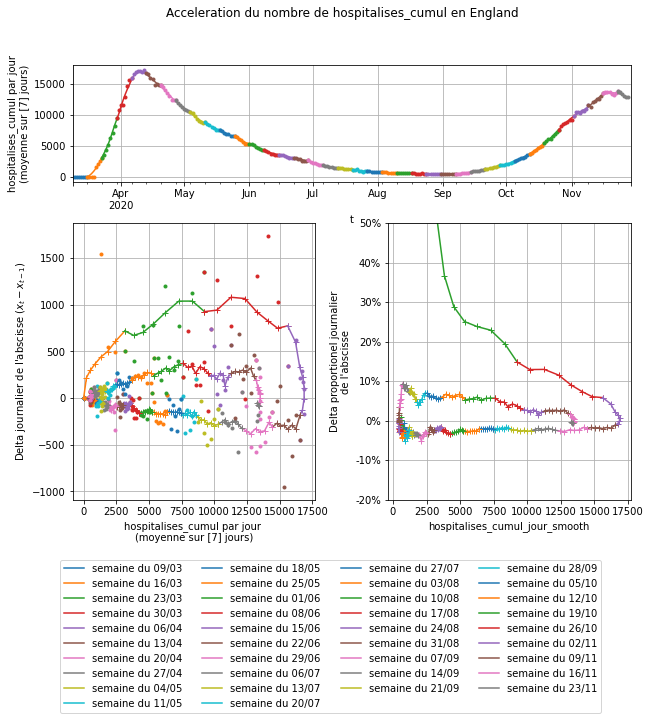

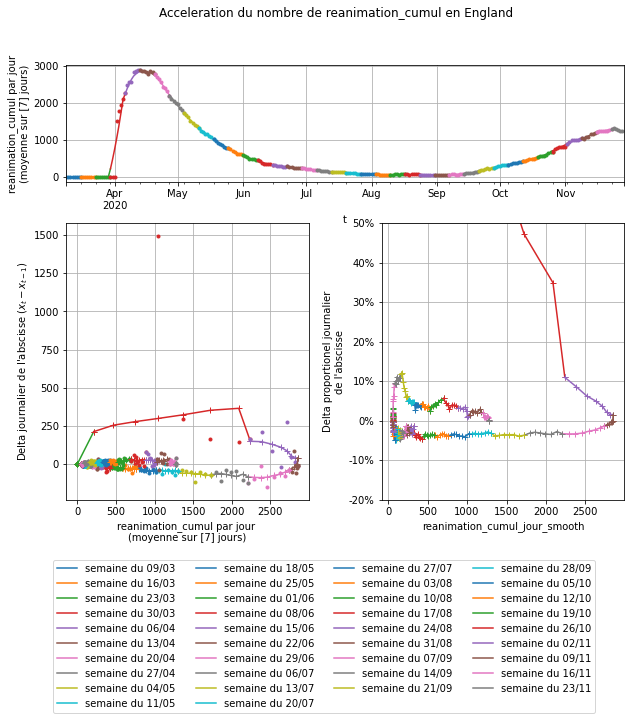

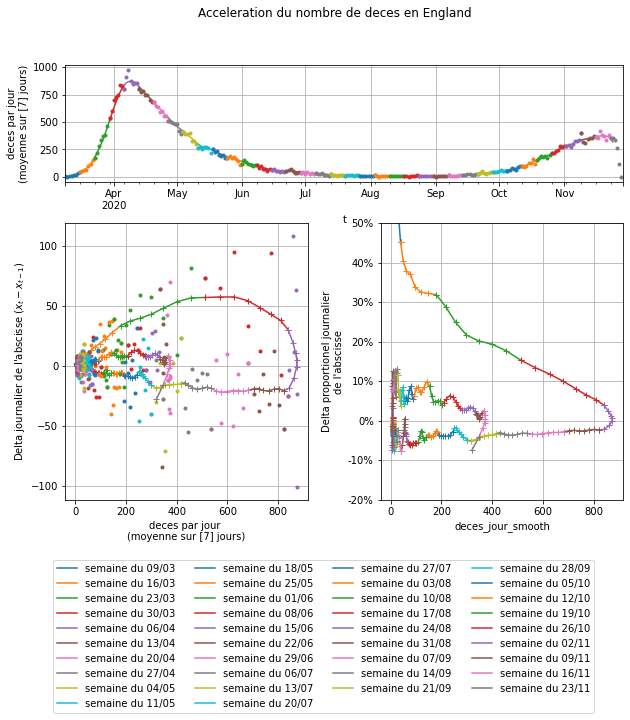

Pour la France le nombre de cas peut-être analysé. Contrairement aux autres quantités le nombre de cas est lissé sur 14 jours avec une fenêtre triangulaire.

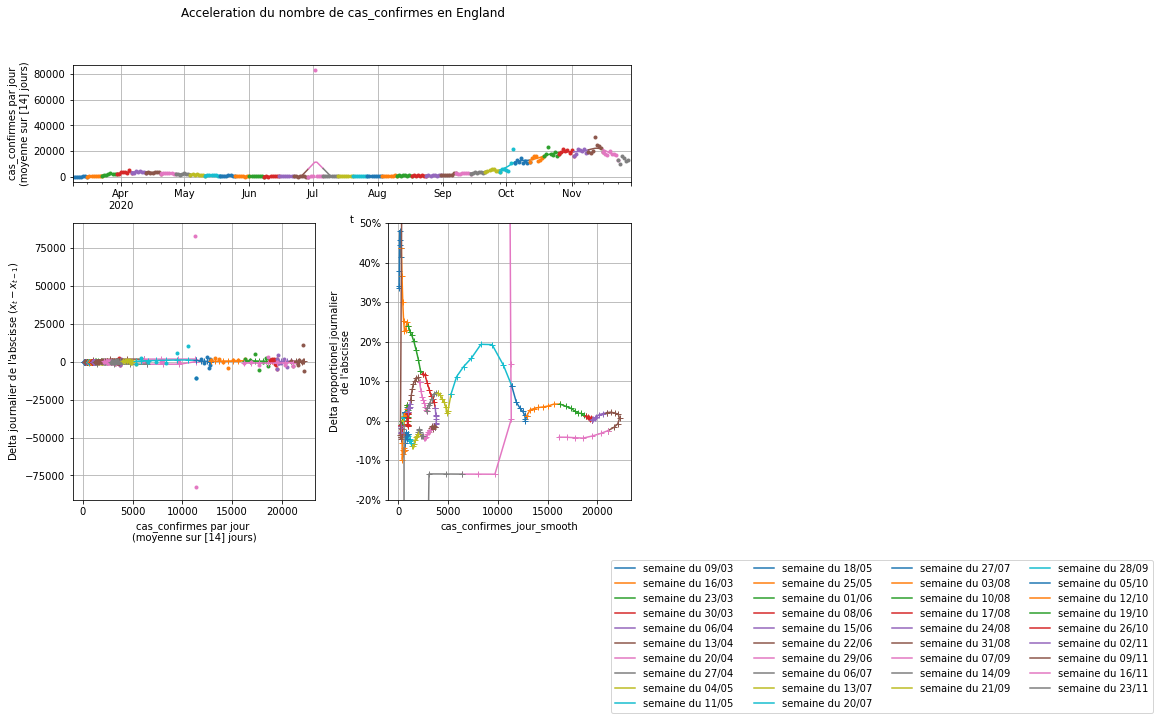

In [85]:
_ = plots_maille_code(maille_active='England')

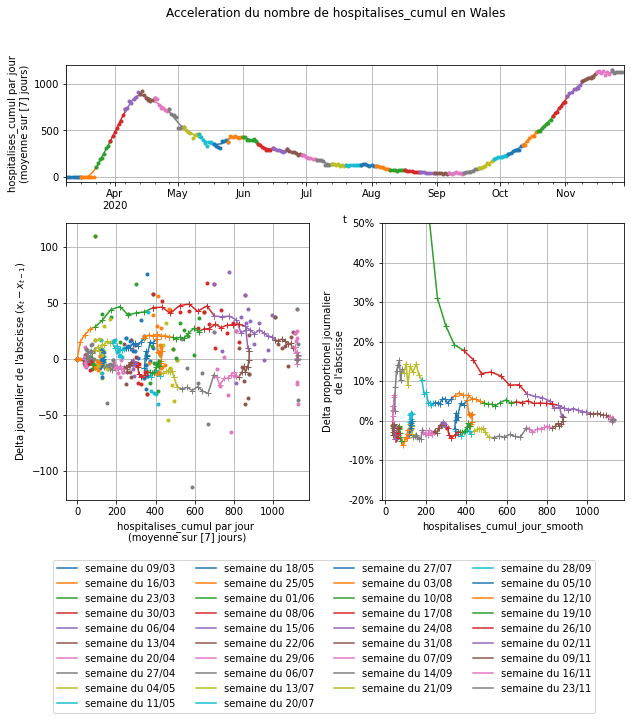

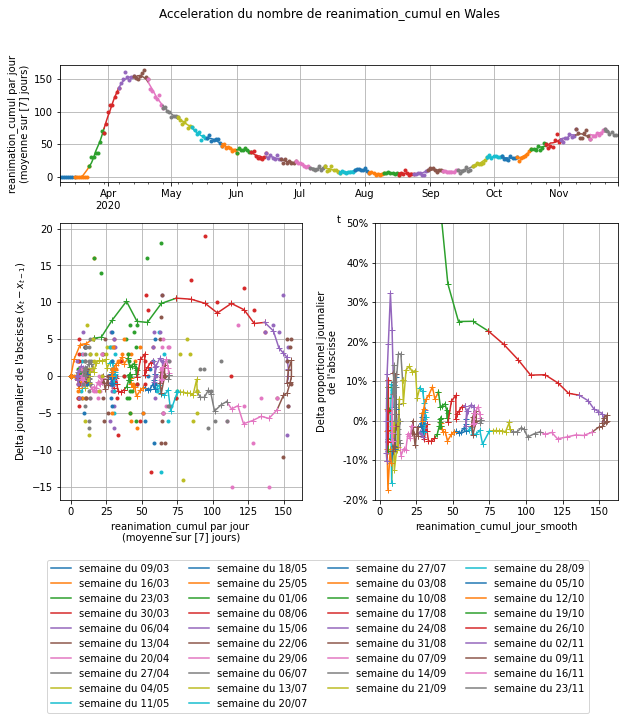

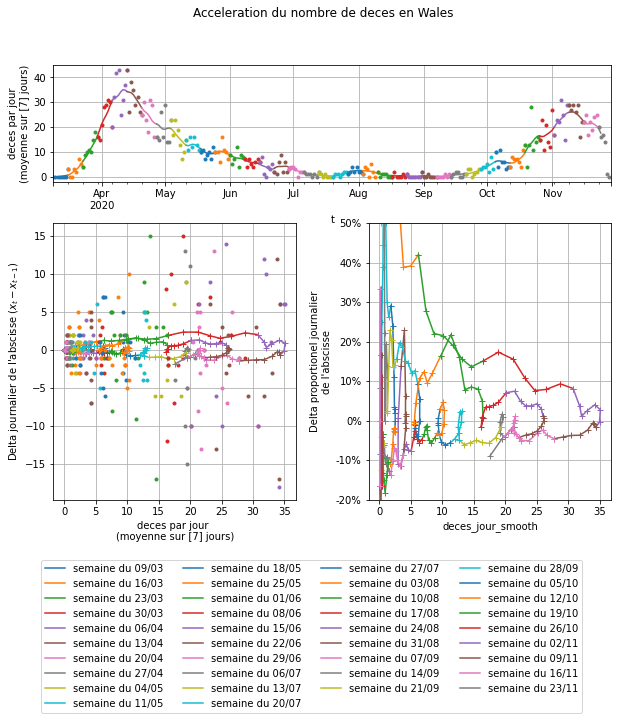

Pour la France le nombre de cas peut-être analysé. Contrairement aux autres quantités le nombre de cas est lissé sur 14 jours avec une fenêtre triangulaire.

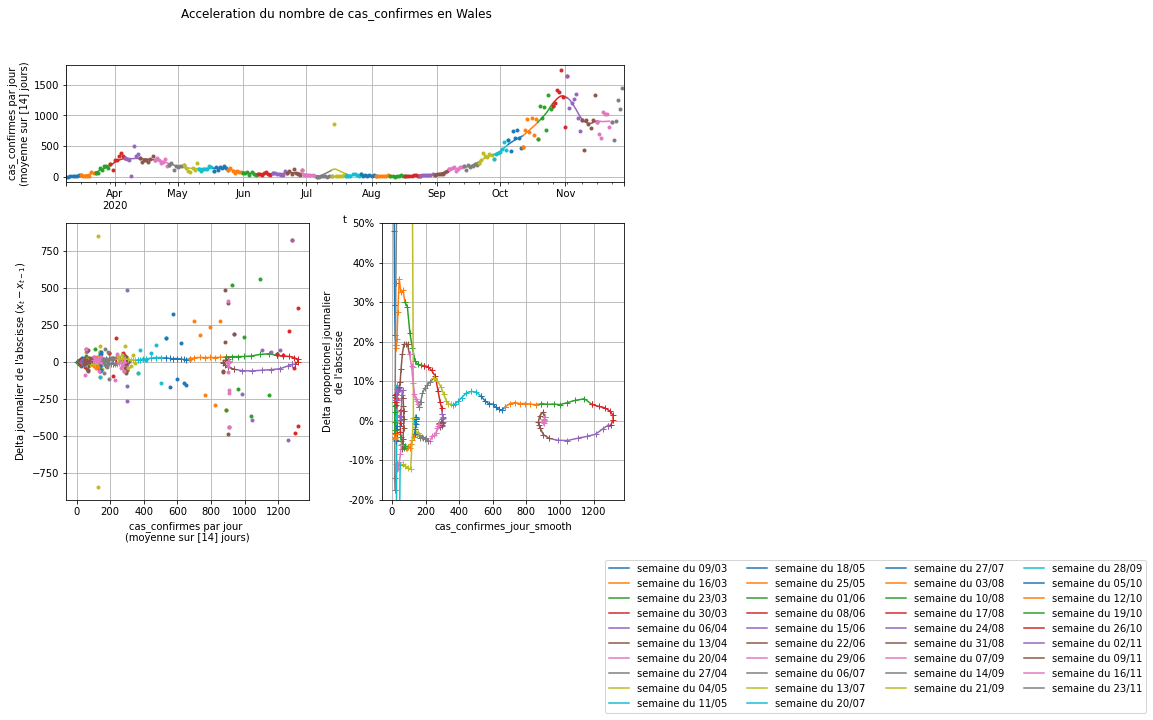

In [86]:
_ = plots_maille_code(maille_active='Wales')

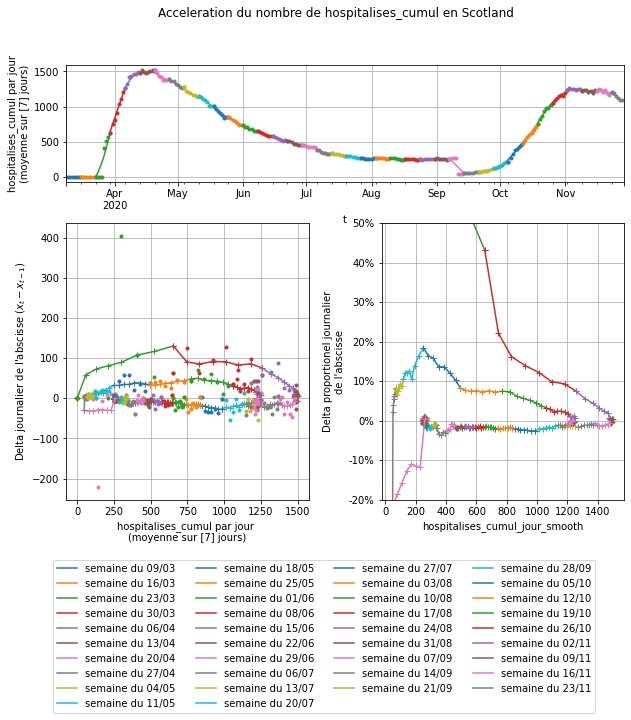

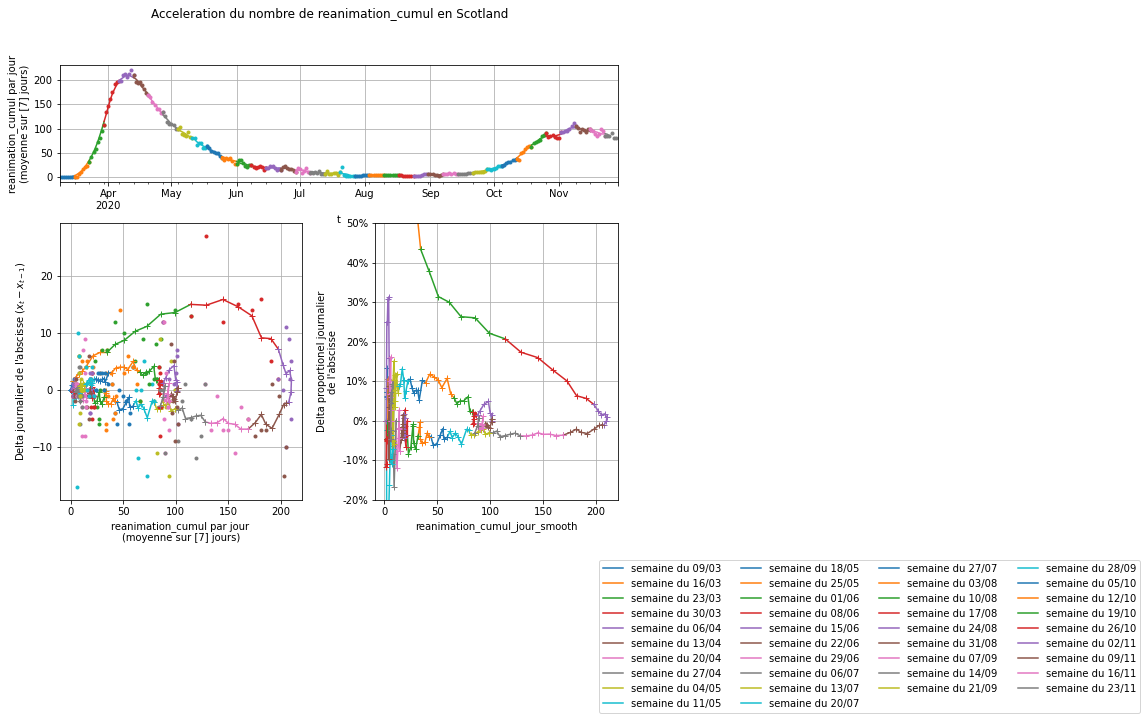

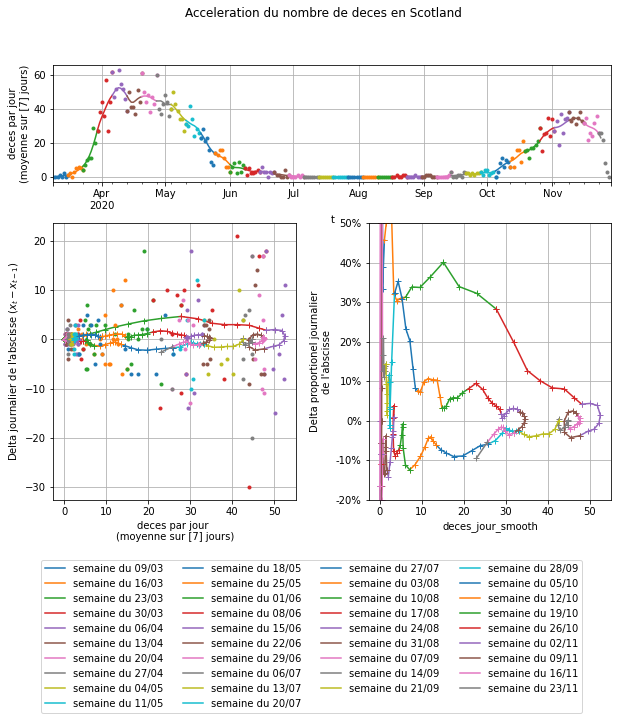

Pour la France le nombre de cas peut-être analysé. Contrairement aux autres quantités le nombre de cas est lissé sur 14 jours avec une fenêtre triangulaire.

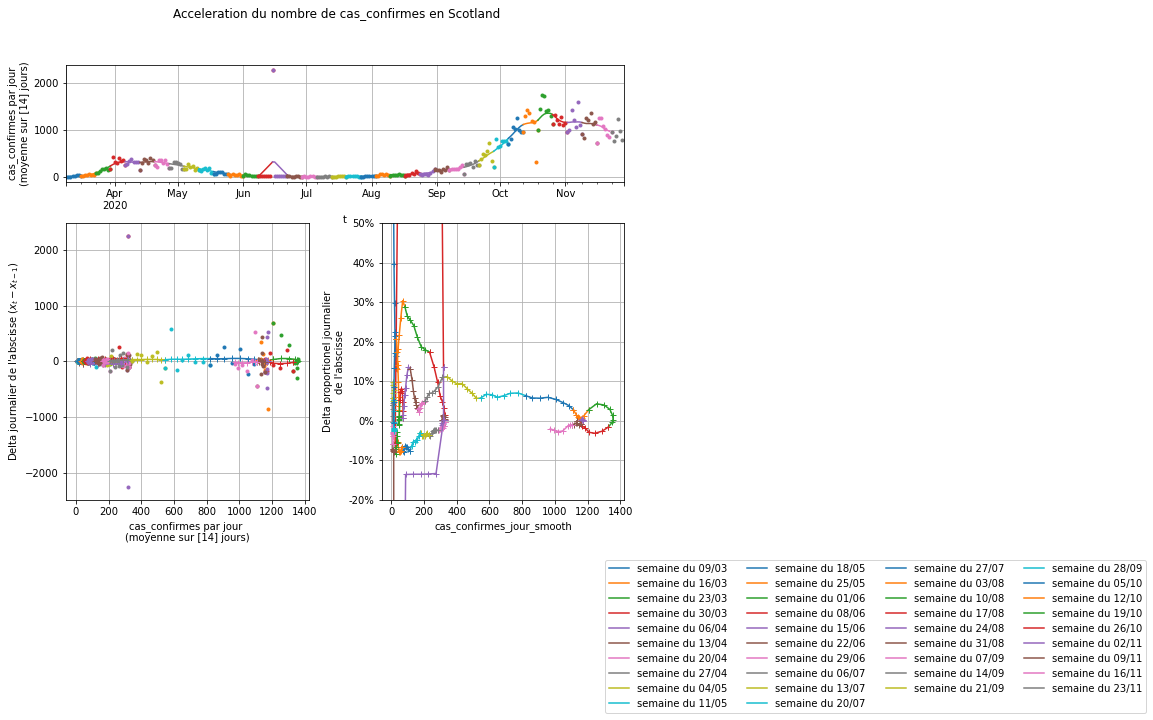

In [87]:
_ = plots_maille_code(maille_active='Scotland')

In [92]:
import pandas as pd

In [ ]:
pd.read_csv(filepath, sep='\b')